In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import load_model
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

DIMENSION = 256
loaded_model = load_model('./target_model')
x_stealed_loaded = np.load('x_val.npy')
y_stealed_loaded = np.loadtxt('y_val.txt', delimiter=',')

# Ataque de evasion

In [2]:
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier

In [3]:
classifier = KerasClassifier(loaded_model)

In [4]:
attack_fgsm = FastGradientMethod(
  estimator=classifier, 
  eps=2.7
)

In [5]:
test_images_adv = attack_fgsm.generate(x=x_stealed_loaded)

c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [6]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


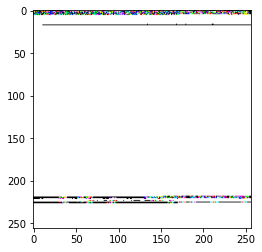

In [7]:
plt.imshow(X=test_images_adv[0])

In [8]:
score_original = classifier._model.evaluate(
  x=x_stealed_loaded,
  y=y_stealed_loaded
)

score_stolen = classifier._model.evaluate(
  x=test_images_adv,
  y=y_stealed_loaded
)

# Comparing test losses
print(f"Original test loss: {score_original[0]:.2f} "  f"vs stolen test loss: {score_stolen[0]:.2f}")

# Comparing test accuracies
print(f"Original test accuracy: {score_original[1]:.2f} " f"vs adversarial test accuracy: {score_stolen[1]:.2f}")

c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Original test loss: 1.00 vs stolen test loss: 4.78
Original test accuracy: 0.89 vs adversarial test accuracy: 0.60


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


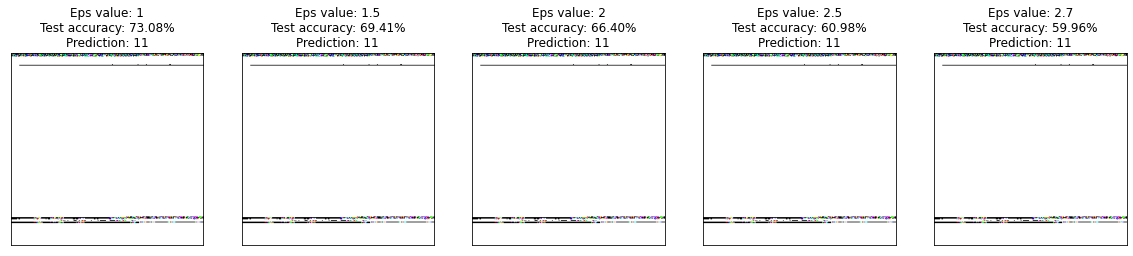

In [13]:
nrows, ncols = 1, 5

fig, axes = plt.subplots(
  nrows=nrows, 
  ncols=ncols, 
  figsize=(20, 10)
)

eps_to_try = [1, 1.5, 2, 2.5, 2.7]

counter = 0

for j in range(ncols):    
  attack_fgsm = FastGradientMethod(
    estimator=classifier, 
    eps=eps_to_try[counter]
  )

  test_images_adv = attack_fgsm.generate(x=x_stealed_loaded)
  axes[j].imshow(X=test_images_adv[0])

  # Disabling x and y ticks
  axes[j].set_xticks(ticks=[])
  axes[j].set_yticks(ticks=[])

  test_score = classifier._model.evaluate(
    x=test_images_adv, 
    y=y_stealed_loaded
  )[1]

  prediction = np.argmax(loaded_model.predict(
    x=np.expand_dims(a=test_images_adv[0], 
    axis=0)
  ))    

  axes[j].set_title(
    label=f"Eps value: {eps_to_try[counter]}\n"
    f"Test accuracy: {test_score * 100:.2f}%\n"
    f"Prediction: {prediction}"
  )

  counter += 1

plt.show()